In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import load_iris
import seaborn as sns
import random
import pandas as pd

# K-means++

In [2]:
import numpy as np
import random

def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.loss = []

    def fit(self, X_train):
        # Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        # Pick a random point from train data for the first centroid
        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.array([np.min([euclidean(centroid, [x]) for centroid in self.centroids]) for x in X_train])
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx][0]]

        iteration = 0
        prev_centroids = None
        while (prev_centroids is None) or (np.linalg.norm(np.array(self.centroids) - np.array(prev_centroids)) > 1e-4 and iteration < self.max_iter):
            # Sort each datapoint, assigning to the nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            dists = np.array([euclidean(x, self.centroids) for x in X_train])
            centroid_idxs = np.argmin(dists, axis=1)

            for i, x in enumerate(X_train):
                centroid_idx = centroid_idxs[i]
                sorted_points[centroid_idx].append(x)

            self.loss.append(np.sqrt(np.mean(np.min(dists, axis=1))))
            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = np.copy(self.centroids)
            self.centroids = [np.mean(cluster, axis=0) if cluster else random.choice(X_train) for cluster in sorted_points]

            iteration += 1

    def evaluate(self, X):
        dists = np.array([euclidean(x, self.centroids) for x in X])
        centroid_idxs = np.argmin(dists, axis=1)
        centroids = [self.centroids[i] for i in centroid_idxs]
        return centroids, centroid_idxs


In [3]:
X = load_iris(as_frame=False).data
y= load_iris(as_frame=False).target

split_ratio = 0.8
split_index = int(len(X) * split_ratio)

# Split the data into training and testing sets
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

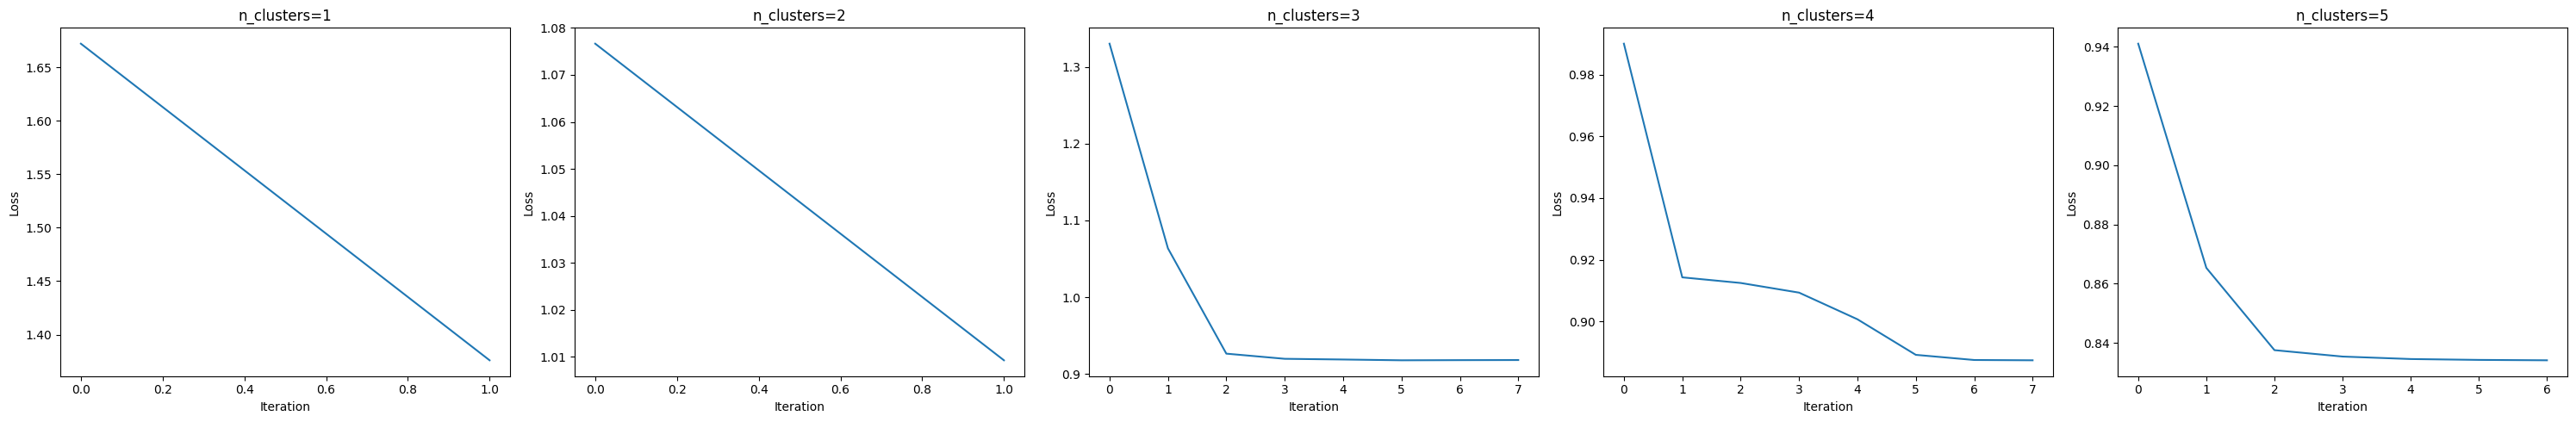

[]

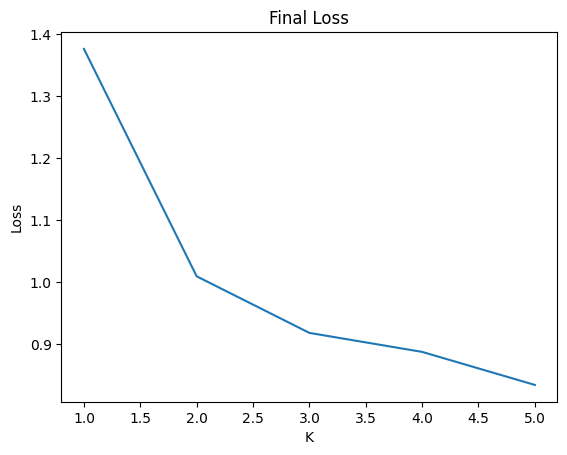

In [4]:
fig, axs = plt.subplots(1, 5, figsize=(30, 5))
losses = []
# Fit centroids to dataset
for n in range(1,6):
  kmeans = KMeans(n_clusters=n)
  kmeans.fit(X_train)
  class_centers, classification = kmeans.evaluate(X_train)
  losses.append(kmeans.loss[-1])
  axs[n-1].plot(kmeans.loss)
  axs[n-1].set_title(f"n_clusters={n}")
  axs[n-1].set_xlabel("Iteration")
  axs[n-1].set_ylabel("Loss")

plt.tight_layout()
plt.show()

plt.plot(range(1,6), losses)
plt.title("Final Loss")
plt.xlabel("K")
plt.ylabel("Loss")
plt.plot()

# K-median++

In [5]:
import numpy as np
import random

def manhattan(point, data):
    """
    Manhattan distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sum(np.abs((point - data)), axis=1)

class KMedian:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.loss = []

    def fit(self, X_train):
        # Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        # Pick a random point from train data for the first centroid
        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.array([np.min([manhattan(centroid, [x]) for centroid in self.centroids]) for x in X_train])
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx][0]]

        iteration = 0
        prev_centroids = None
        while (prev_centroids is None) or (np.linalg.norm(np.array(self.centroids) - np.array(prev_centroids)) > 1e-4 and iteration < self.max_iter):
            # Sort each datapoint, assigning to the nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            dists = np.array([manhattan(x, self.centroids) for x in X_train])
            centroid_idxs = np.argmin(dists, axis=1)

            for i, x in enumerate(X_train):
                centroid_idx = centroid_idxs[i]
                sorted_points[centroid_idx].append(x)

            self.loss.append(np.sqrt(np.mean(np.min(dists, axis=1))))
            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = np.copy(self.centroids)
            self.centroids = [np.mean(cluster, axis=0) if cluster else random.choice(X_train) for cluster in sorted_points]

            iteration += 1

    def evaluate(self, X):
        dists = np.array([manhattan(x, self.centroids) for x in X])
        centroid_idxs = np.argmin(dists, axis=1)
        centroids = [self.centroids[i] for i in centroid_idxs]
        return centroids, centroid_idxs


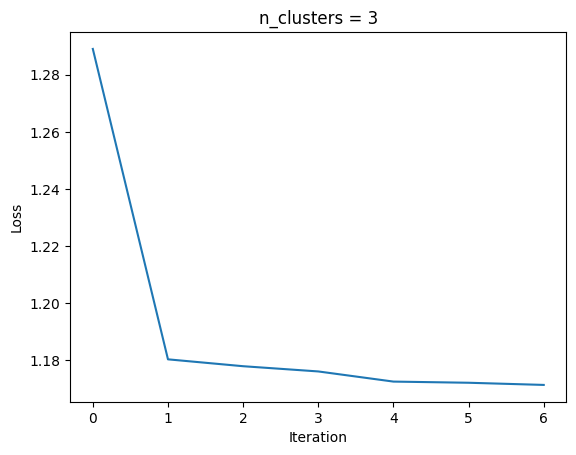

In [6]:
kmedian = KMedian(n_clusters=3)
kmedian.fit(X_train)
class_centers, classification = kmedian.evaluate(X_train)

plt.plot(kmedian.loss)
plt.title(f"n_clusters = 3")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

In [7]:
num_outliers = 20
outliers = np.random.normal(loc=4, scale=3, size=(num_outliers, X_train.shape[1]))
X_train_with_outliers = np.vstack([X_train, outliers])

In [8]:
kmedian_outlier = KMedian(n_clusters=3)
kmedian_outlier.fit(X_train_with_outliers)

kmeans_outlier = KMeans(n_clusters=3)
kmeans_outlier.fit(X_train_with_outliers)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

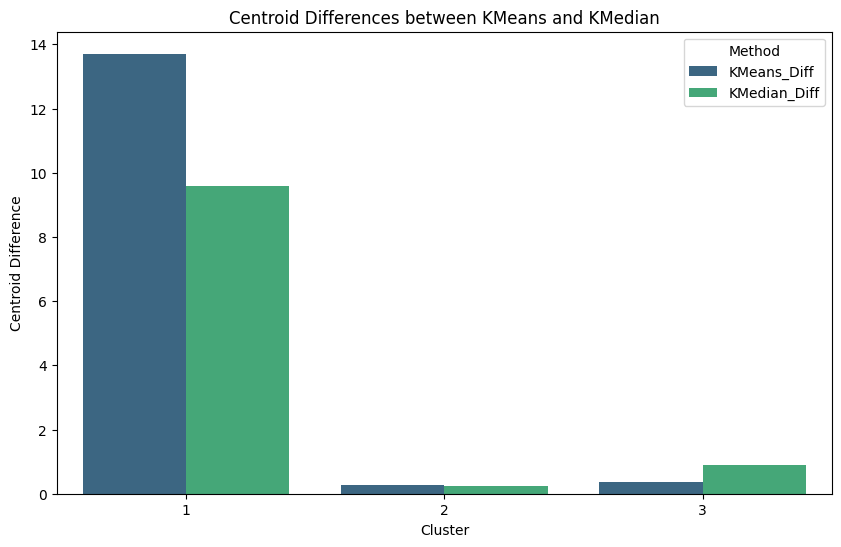

In [9]:
kmeans_diff = np.linalg.norm(np.subtract(kmeans.centroids, kmeans_outlier.centroids), axis=1)
kmedian_diff = np.linalg.norm(np.subtract(kmedian.centroids, kmedian_outlier.centroids), axis=1)

df = pd.DataFrame({
    'Cluster': np.arange(1, 4),
    'KMeans_Diff': kmeans_diff,
    'KMedian_Diff': kmedian_diff
})

# Melt the DataFrame for easier plotting
df_melted = pd.melt(df, id_vars='Cluster', var_name='Method', value_name='Centroid Difference')

# Use Seaborn to create a combined bar plot and line plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Centroid Difference', hue='Method', data=df_melted, palette='viridis')


plt.xlabel('Cluster')
plt.ylabel('Centroid Difference')
plt.title('Centroid Differences between KMeans and KMedian')

# Show the plot
plt.show()